In [1]:
import logging
from glob import glob

from live2p.workers import RealTimeQueue
from live2p.utils import (get_nchannels, get_nvols, 
                          get_tslice, ptoc, slice_movie, 
                          tic, get_true_mm3d_range)
from live2p.offline import run_plane_offline

# logging setup
# change for more or less information...
caiman_loglevel = logging.WARNING
live2p_loglevel = logging.DEBUG

# changes how logs/updates are printed
logformat = '{relativeCreated:08.0f} - {levelname:8} - [{module}:{funcName}:{lineno}] - {message}'
logging.basicConfig(level=caiman_loglevel, format=logformat, style='{') #sets caiman loglevel
logger = logging.getLogger('live2p')
logger.setLevel(live2p_loglevel) # sets live2p debug level

In [2]:
# experiment info
# put the makeMasks3D image mat file in the folder with your data
#tiff_folder = 'e:/caiman_scratch/test_data/ori/data'
tiff_folder = 'C:/Users/ian/Documents/DATA/DataStorage/W29_3/210201/6'

plane = 0 # index starts at 0 (for single plane)
nplanes = 3 # for running multiple planes
fr = 6.36

# x_start and x_end need to be the same or larger than what is in mm3d
# x_start = 110
# x_end = 512-110
# we can auto-determine them now...
# but note: if the stim/vis artifact is in the cropped range, there will be problems
# with motion correction and/or F extraction
mm3d_path = glob(tiff_folder + '/*.mat')[0]
x_start, x_end = get_true_mm3d_range(mm3d_path)
print(f'makeMasks3D range determine to be: {x_start} to {x_end} (pixels)')

# pre-allocated frame buffer, per plane
max_frames = 30000

n_init = 500

makeMasks3D range determine to be: 106 to 404 (pixels)


In [3]:
params = {
    'fr': fr,
    'p': 1,  # deconv 0 is off, 1 is slow, 2 is fast
    'nb': 3,  # background compenents -> nb: 3 for complex
    'decay_time': 1.0,  # sensor tau
    'gSig': (7, 7),  # expected half size of neurons in pixels, very important for proper component detection
    'init_method': 'seeded',
    'motion_correct': True,
    'expected_comps': 300,
    'update_num_comps': False, #standard is False
    'update_freq': 100,
    'niter_rig': 2,
    'pw_rigid': False,
    'dist_shape_update': False,
    'normalize': True,
    'sniper_mode': False,
    'test_both': False,
    'ring_CNN': False,
    'simultaneously': True,
    'use_cuda': False,
    #'rf': None, #normally remove
    #'only_init': False, #normally remove
}

In [4]:
# run a single plane offline
# result = run_plane_offline(plane, tiff_folder, params, x_start, x_end, n_init, max_frames)

In [4]:
# run all planes offline
# as run_plane_offline is already multi-process, so the simplest way to do this is to run planes sequentially

t = tic()
data = []
for p in range(nplanes):
    print(f'***** Starting Plane {p} *****')
    result = run_plane_offline(p, tiff_folder, params, x_start, x_end, n_init, max_frames, add_rate=0.5)
    data.append(result)
print('All done!')
ptoc(t, 'Whole thing took')


***** Starting Plane 0 *****
getting files for initialization....


00026525 - DEBUG    - [workers:__init__:45] - Setting up params...
00026534 - DEBUG    - [workers:_setup_folders:106] - Set temp_path to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\6\live2p\tmp
00026536 - DEBUG    - [workers:_setup_folders:109] - Set out_path to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\6\live2p\out
00026536 - DEBUG    - [workers:_setup_folders:113] - Set working dir to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\6\live2p\tmp


starting initialization...


00026870 - INFO     - [workers:__init__:202] - Starting live2p worker.
00026870 - INFO     - [workers:__init__:217] - Starting new OnACID initialization for live2p.
00026886 - DEBUG    - [workers:make_init_mmap:224] - Making init memmap...


Plane 0: Found 76 sources from MM3D...


00034197 - DEBUG    - [workers:make_init_mmap:242] - Init mmap saved to initplane0_d1_512_d2_298_d3_1_order_C_frames_508_.mmap.
00036994 - WARNING  - [movies:extract_shifts:371] - Movie average is negative. Removing 1st percentile.
00044415 - WARNING  - [movies:extract_shifts:371] - Movie average is negative. Removing 1st percentile.
00052103 - WARNING  - [movies:extract_shifts:371] - Movie average is negative. Removing 1st percentile.
C:\Users\ian\.conda\envs\live2p\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 10 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
00080634 - INFO     - [workers:save_acid:446] - Saved OnACID hdf5 to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\live2p_init\realtime_init_plane_0.hdf5
00080650 - DEBUG    - [workers:initialize:273] - OnACID initialized.
00080650 - INFO     - [wrappers:wrapper_timer:16] - <live2p.workers.initialize> done in 4

starting queue...
starting worker...


00099838 - INFO     - [workers:process_frame_from_queue:345] - Total of 1000 frames processed. (Queue 0)
00099853 - INFO     - [workers:process_frame_from_queue:349] - Average processing time: 16 ms. (61.65 Hz) (Queue 0)
00120290 - INFO     - [workers:process_frame_from_queue:345] - Total of 1500 frames processed. (Queue 0)
00120290 - INFO     - [workers:process_frame_from_queue:349] - Average processing time: 29 ms. (33.54 Hz) (Queue 0)
00140103 - INFO     - [workers:process_frame_from_queue:345] - Total of 2000 frames processed. (Queue 0)
00140103 - INFO     - [workers:process_frame_from_queue:349] - Average processing time: 17 ms. (57.84 Hz) (Queue 0)
00160572 - INFO     - [workers:process_frame_from_queue:345] - Total of 2500 frames processed. (Queue 0)
00160587 - INFO     - [workers:process_frame_from_queue:349] - Average processing time: 16 ms. (62.14 Hz) (Queue 0)
00180228 - INFO     - [workers:process_frame_from_queue:345] - Total of 3000 frames processed. (Queue 0)
00180228 - 

00837962 - DEBUG    - [workers:process_frame_from_queue:357] - Processing done at: 13:58:06
00837962 - INFO     - [workers:process_frame_from_queue:358] - Getting final results...
00844306 - INFO     - [workers:save_acid:446] - Saved OnACID hdf5 to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\6\live2p\out\realtime_results_plane_0.hdf5
00885525 - INFO     - [workers:save_json:435] - Saved JSON to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\6\live2p\out\realtime_plane_0.json


done!


00888478 - DEBUG    - [workers:_stop_cluster:97] - Cluster stopped.
00888478 - DEBUG    - [workers:__del__:75] - Worker object destroyed on delete.


***** Starting Plane 1 *****
getting files for initialization....


00899462 - DEBUG    - [workers:__init__:45] - Setting up params...
00899484 - DEBUG    - [workers:_setup_folders:106] - Set temp_path to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\6\live2p\tmp
00899485 - DEBUG    - [workers:_setup_folders:109] - Set out_path to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\6\live2p\out
00899486 - DEBUG    - [workers:_setup_folders:113] - Set working dir to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\6\live2p\tmp


starting initialization...


00899869 - INFO     - [workers:__init__:202] - Starting live2p worker.
00899885 - INFO     - [workers:__init__:217] - Starting new OnACID initialization for live2p.
00899886 - DEBUG    - [workers:make_init_mmap:224] - Making init memmap...


Plane 1: Found 112 sources from MM3D...


00907304 - DEBUG    - [workers:make_init_mmap:242] - Init mmap saved to initplane1_d1_512_d2_298_d3_1_order_C_frames_508_.mmap.
00910434 - WARNING  - [movies:extract_shifts:371] - Movie average is negative. Removing 1st percentile.
00918463 - WARNING  - [movies:extract_shifts:371] - Movie average is negative. Removing 1st percentile.
00926181 - WARNING  - [movies:extract_shifts:371] - Movie average is negative. Removing 1st percentile.
C:\Users\ian\.conda\envs\live2p\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 10 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
00962915 - INFO     - [workers:save_acid:446] - Saved OnACID hdf5 to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\live2p_init\realtime_init_plane_1.hdf5
00962915 - DEBUG    - [workers:initialize:273] - OnACID initialized.
00962915 - INFO     - [wrappers:wrapper_timer:16] - <live2p.workers.initialize> done in 5

starting queue...
starting worker...


00983509 - INFO     - [workers:process_frame_from_queue:345] - Total of 1000 frames processed. (Queue 1)
00983525 - INFO     - [workers:process_frame_from_queue:349] - Average processing time: 17 ms. (55.9 Hz) (Queue 1)
01002142 - INFO     - [workers:process_frame_from_queue:345] - Total of 1500 frames processed. (Queue 1)
01002143 - INFO     - [workers:process_frame_from_queue:349] - Average processing time: 19 ms. (51.62 Hz) (Queue 1)
01022962 - INFO     - [workers:process_frame_from_queue:345] - Total of 2000 frames processed. (Queue 1)
01022978 - INFO     - [workers:process_frame_from_queue:349] - Average processing time: 33 ms. (29.87 Hz) (Queue 1)
01043790 - INFO     - [workers:process_frame_from_queue:345] - Total of 2500 frames processed. (Queue 1)
01043790 - INFO     - [workers:process_frame_from_queue:349] - Average processing time: 27 ms. (36.48 Hz) (Queue 1)
01063384 - INFO     - [workers:process_frame_from_queue:345] - Total of 3000 frames processed. (Queue 1)
01063384 - I

01688215 - DEBUG    - [workers:process_frame_from_queue:357] - Processing done at: 14:12:17
01688216 - INFO     - [workers:process_frame_from_queue:358] - Getting final results...
01694868 - INFO     - [workers:save_acid:446] - Saved OnACID hdf5 to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\6\live2p\out\realtime_results_plane_1.hdf5
01758353 - INFO     - [workers:save_json:435] - Saved JSON to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\6\live2p\out\realtime_plane_1.json


done!


01762040 - DEBUG    - [workers:_stop_cluster:97] - Cluster stopped.
01762040 - DEBUG    - [workers:__del__:75] - Worker object destroyed on delete.


***** Starting Plane 2 *****
getting files for initialization....


01772540 - DEBUG    - [workers:__init__:45] - Setting up params...
01772563 - DEBUG    - [workers:_setup_folders:106] - Set temp_path to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\6\live2p\tmp
01772565 - DEBUG    - [workers:_setup_folders:109] - Set out_path to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\6\live2p\out
01772565 - DEBUG    - [workers:_setup_folders:113] - Set working dir to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\6\live2p\tmp


starting initialization...


01773087 - INFO     - [workers:__init__:202] - Starting live2p worker.
01773087 - INFO     - [workers:__init__:217] - Starting new OnACID initialization for live2p.
01773099 - DEBUG    - [workers:make_init_mmap:224] - Making init memmap...


Plane 2: Found 115 sources from MM3D...


01780447 - DEBUG    - [workers:make_init_mmap:242] - Init mmap saved to initplane2_d1_512_d2_298_d3_1_order_C_frames_508_.mmap.
01783775 - WARNING  - [movies:extract_shifts:371] - Movie average is negative. Removing 1st percentile.
01792853 - WARNING  - [movies:extract_shifts:371] - Movie average is negative. Removing 1st percentile.
01801759 - WARNING  - [movies:extract_shifts:371] - Movie average is negative. Removing 1st percentile.
C:\Users\ian\.conda\envs\live2p\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 10 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
01838915 - INFO     - [workers:save_acid:446] - Saved OnACID hdf5 to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\live2p_init\realtime_init_plane_2.hdf5
01838915 - DEBUG    - [workers:initialize:273] - OnACID initialized.
01838915 - INFO     - [wrappers:wrapper_timer:16] - <live2p.workers.initialize> done in 5

starting queue...
starting worker...


01860775 - INFO     - [workers:process_frame_from_queue:345] - Total of 1000 frames processed. (Queue 2)
01860775 - INFO     - [workers:process_frame_from_queue:349] - Average processing time: 23 ms. (43.13 Hz) (Queue 2)
01878134 - INFO     - [workers:process_frame_from_queue:345] - Total of 1500 frames processed. (Queue 2)
01878134 - INFO     - [workers:process_frame_from_queue:349] - Average processing time: 18 ms. (54.31 Hz) (Queue 2)
01898181 - INFO     - [workers:process_frame_from_queue:345] - Total of 2000 frames processed. (Queue 2)
01898181 - INFO     - [workers:process_frame_from_queue:349] - Average processing time: 40 ms. (24.89 Hz) (Queue 2)
01918056 - INFO     - [workers:process_frame_from_queue:345] - Total of 2500 frames processed. (Queue 2)
01918056 - INFO     - [workers:process_frame_from_queue:349] - Average processing time: 20 ms. (49.24 Hz) (Queue 2)
01936381 - INFO     - [workers:process_frame_from_queue:345] - Total of 3000 frames processed. (Queue 2)
01936381 - 

02572306 - DEBUG    - [workers:process_frame_from_queue:357] - Processing done at: 14:27:01
02572306 - INFO     - [workers:process_frame_from_queue:358] - Getting final results...
02579134 - INFO     - [workers:save_acid:446] - Saved OnACID hdf5 to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\6\live2p\out\realtime_results_plane_2.hdf5
02645478 - INFO     - [workers:save_json:435] - Saved JSON to C:\Users\ian\Documents\DATA\DataStorage\W29_3\210201\6\live2p\out\realtime_plane_2.json


done!


02648619 - DEBUG    - [workers:_stop_cluster:97] - Cluster stopped.
02648621 - DEBUG    - [workers:__del__:75] - Worker object destroyed on delete.


All done!
Whole thing took 2623.1178 s


2623.1178377

### Once that is all done the data is returned into a list of python dictionaries

So to access the results of a single plane, index into the list and then access fields in the dictionary with a string.

`data[plane_idx]['plane']` returns the plane number

`data[plane_idx]['C']` returns the denoised spatial components

`data[plane_idx]['nC']` returns the raw signal (or something close to it)

Note: the data is stored as lists NOT np.arrays, so to use them you need to convert them to arrays with `np.array(list)` or concatenate the lists (eg. C values for all planes) which will also return a np.array

In [5]:
data[0].keys()

dict_keys(['plane', 't', 'A', 'b', 'C', 'f', 'nC', 'YrA', 'CoM', 'dims', 'shifts'])

### Make and save the data as a .mat:

In [6]:
import numpy as np
import scipy.io as sio

import json
pth = 'C:/Users/ian/Documents/DATA/DataStorage/W29_3/210201/6/file_lengths.json' #'path/to/file.json'
with open(pth, 'r') as f:
    dataFileLengths = json.load(f)
lengths = np.array(dataFileLengths['lengths'])

In [7]:
# make CoMs have z_value
planes = [0,1,2]
# planes = [0, 30 60]

locs = []
for i,dat in enumerate(data):
    z_plane = planes[i]
    coms = np.array(dat['CoM'], dtype=int)
    ps = np.full((coms.shape[0],1), fill_value=z_plane)
    xyz = np.hstack((coms, ps))
    locs.append(xyz)
    
locs = np.vstack(locs)

In [15]:
# c is denoiced, nC is raw, a is spatial
c = np.concatenate([dat['C'] for dat in data])
nC = np.concatenate([dat['nC'] for dat in data])
a = np.hstack([dat['A'] for dat in data])
shifts = np.concatenate([dat['shifts'] for dat in data])


['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [16]:
dir(c)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [9]:
mat = {
    'c':c,
    'nC':nC,
    'a':a,
    'locs':locs,
    'lengths':lengths,
    'shifts':shifts
}

#fpath_to_save = 'path/to/save/fname.mat'
fpath_to_save = 'C:/Users/ian/Documents/DATA/DataStorage/W29_3/210201/live2pData.mat'
sio.savemat(fpath_to_save, mat)

## Play with data in python

In [15]:
import matplotlib.pyplot as plt

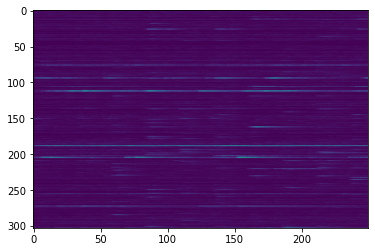

In [16]:
plt.imshow(c[:,:250], aspect='auto')

Text(0.5, 0.98, 'Denoised Traces')

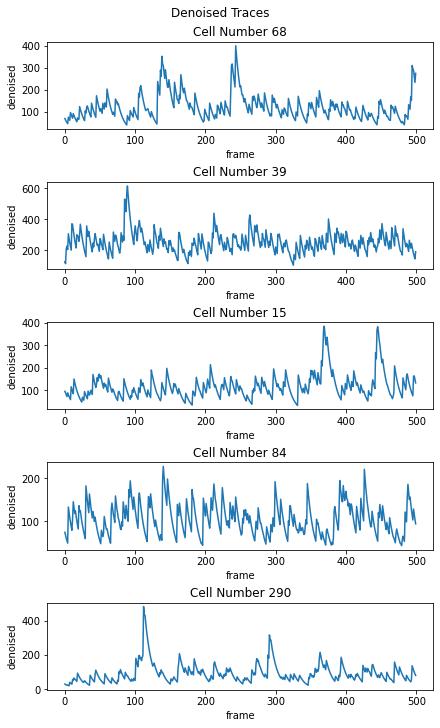

In [17]:
randcells = np.random.choice(np.arange(c.shape[0]), 5, replace=False)
fig, axes = plt.subplots(5,1, constrained_layout=True, figsize=(6,10))

for ax,rc in zip(axes, randcells):
    ax.plot(c[rc, :500])
    ax.set_title(f'Cell Number {rc}')
    ax.set_ylabel('denoised')
    ax.set_xlabel('frame')
    
fig.suptitle('Denoised Traces')

Text(0.5, 0.98, 'Noisy Traces')

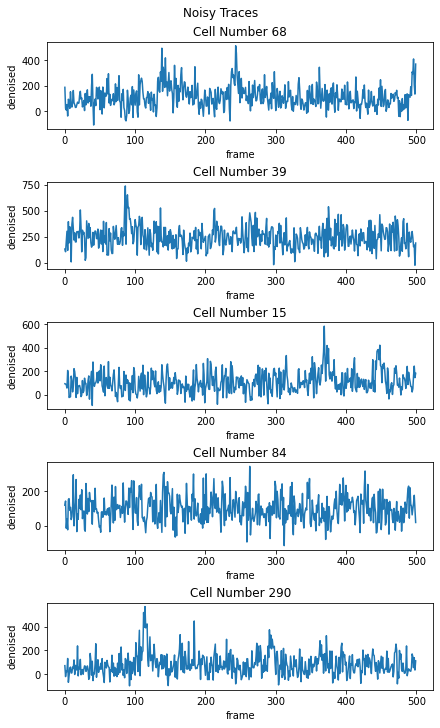

In [18]:
# randcells = np.random.choice(np.arange(c.shape[0]), 5, replace=False)
fig, axes = plt.subplots(5,1, constrained_layout=True, figsize=(6,10))

for ax,rc in zip(axes, randcells):
    ax.plot(nC[rc, :500])
    ax.set_title(f'Cell Number {rc}')
    ax.set_ylabel('denoised')
    ax.set_xlabel('frame')
    
fig.suptitle('Noisy Traces')

In [19]:
dims = data[0]['dims']
a2 = a.reshape((*dims, -1), order='F')
a2.shape

(512, 298, 303)

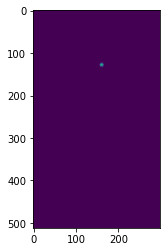

In [20]:
cell = 55
plt.imshow(a2[:,:,cell])

13360494 - ERROR    - [ultratb:inspect_error:152] - Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ian\.conda\envs\live2p\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-24-80a4aab09c73>", line 1, in <module>
    data[0]
  File "C:\Users\ian\.conda\envs\live2p\lib\site-packages\IPython\core\displayhook.py", line 262, in __call__
    format_dict, md_dict = self.compute_format_data(result)
  File "C:\Users\ian\.conda\envs\live2p\lib\site-packages\IPython\core\displayhook.py", line 151, in compute_format_data
    return self.shell.display_formatter.format(result)
  File "C:\Users\ian\.conda\envs\live2p\lib\site-packages\IPython\core\formatters.py", line 180, in format
    data = formatter(obj)
  File "C:\Users\ian\.conda\envs\live2p\lib\site-packages\decorator.py", line 232, in fun
    return caller(func, *(extras + args), **kw)
  File "C:\Users\ian\.conda\envs\live2p\lib\site-packages\IPython\core\formatters.py", line 224, in catc

TypeError: object of type 'NoneType' has no len()